In [1]:
import numpy as np
import pandas as pd
import random

from matplotlib import pyplot as plt

%matplotlib inline

# Кластеризация

## Задача кластеризации

Задача состоит в разделении выборки на кластеры похожих элементов.

Эта задача является примером unsupervised learning, так как у нас нет никаких меток класса. Соответственно, и делить на train и test выборку бессмысленно.

Чаще всего данные должны представлять из себя точки в пространстве. В наших примерах для наглядности это будут точки на плоскости.

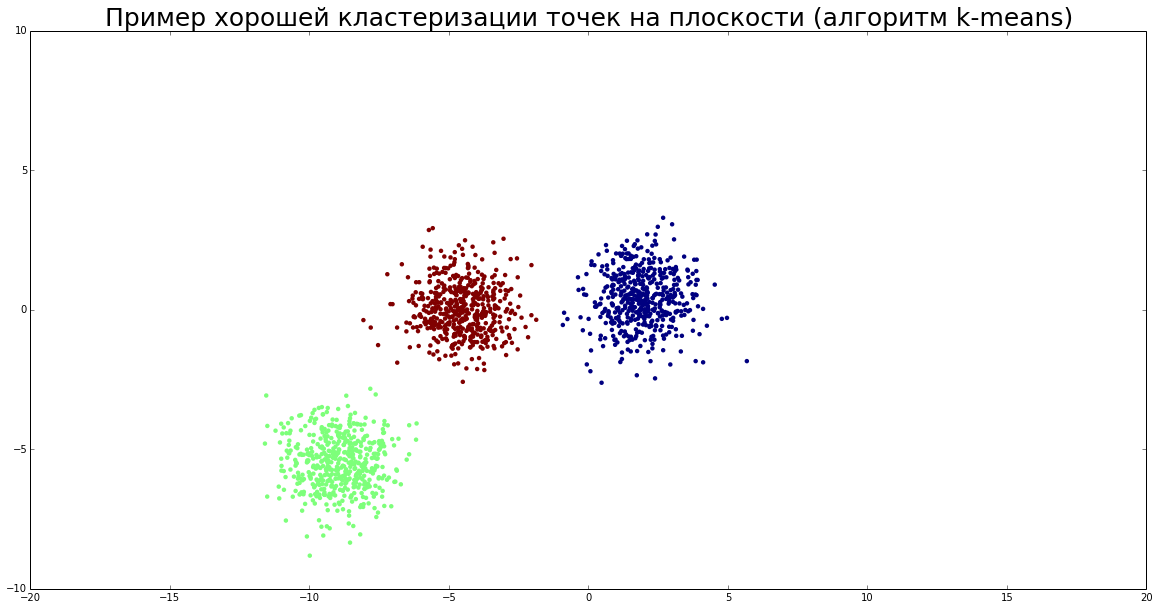

In [20]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(20, 10))

n_samples = 1500
random_state = 170

# Сгенерируем три кучки точек
X, y = make_blobs(n_samples=n_samples,
                  random_state=random_state,
                  centers=3)

# Используем алгоритм K-Means для кластеризации точек
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolors='none')

plt.title(u"Пример хорошей кластеризации точек на плоскости (алгоритм k-means)", fontsize=25)
plt.xlim((-20, 20))
plt.ylim((-10, 10))

plt.show()

Приведем несколько более сложных примеров кластеров:

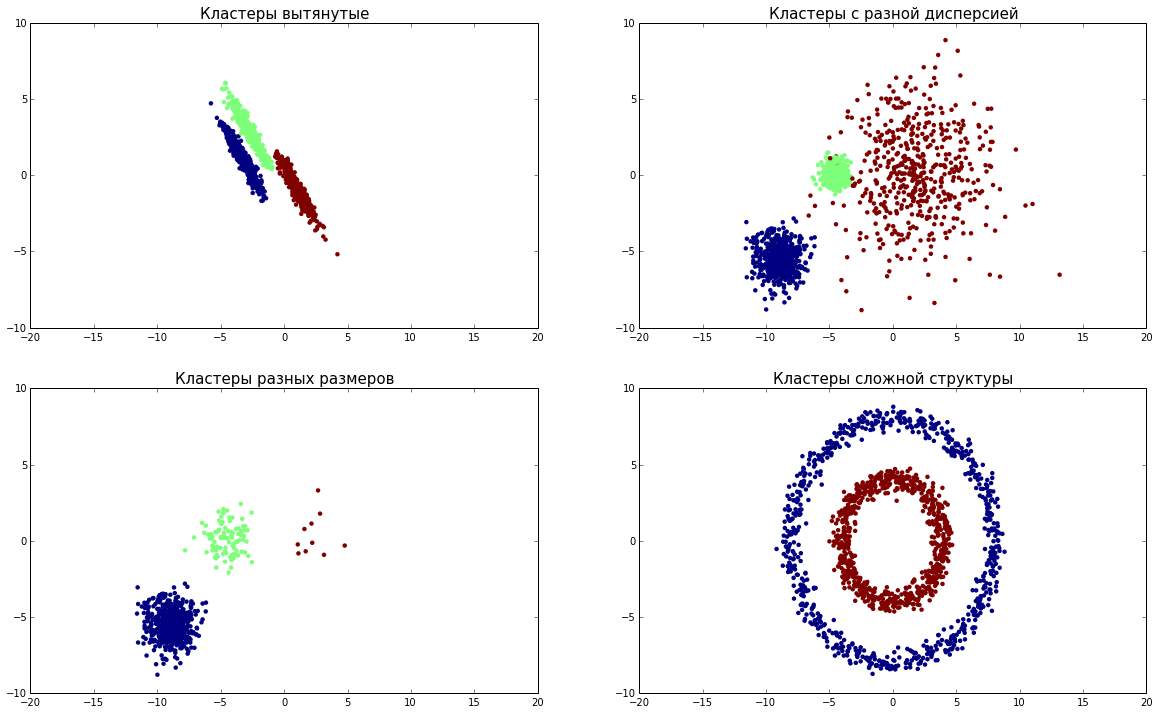

In [111]:
from sklearn.datasets import make_circles

plt.figure(figsize=(20, 12))

# Кластеры вытянутые
X, y = make_blobs(n_samples=n_samples,
                  random_state=random_state,
                  centers=3)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_long = np.dot(X, transformation)

plt.subplot(221)
plt.scatter(X_long[:, 0], X_long[:, 1], c=y, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Кластеры вытянутые", fontsize=15)

# Кластеры с разной дисперсией
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1, 0.5, 3],
                                random_state=random_state)

plt.subplot(222)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Кластеры с разной дисперсией", fontsize=15)

# Кластеры разных размеров
X_sizes = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_sizes = [0] * 500 + [1] * 100 + [2] * 10

plt.subplot(223)
plt.scatter(X_sizes[:, 0], X_sizes[:, 1], c=y_sizes, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Кластеры разных размеров", fontsize=15)

# Кластеры сложной структуры
X_circles, y = make_circles(n_samples=1500, factor=0.5, noise=0.05)
X_circles *= 8

plt.subplot(224)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Кластеры сложной структуры", fontsize=15)

plt.show()

### Применения

* Проанализировать неразмеченные данные, понять, на какие группы они делятся
* Решить задачу классификации в случае, когда мало (или совсем нет) размеченных классов
* Использовать номер кластера как признак в более сложной модели

## Алгоритм k-means

### <a href='https://www.naftaliharris.com/blog/visualizing-k-means-clustering/'> Визуализация </a>

Посмотрите примеры применения k-means на разных датасетах.

### Описание

Нужно в начале выбрать K центров кластеров (K - константа, которую надо самому выбрать). Есть разные способы:
* случайно
* вручную
* выбирать самую далекую точку от предыдущих
* умный способ  <a href='https://ru.wikipedia.org/wiki/K-means%2B%2B'> k-means++ </a>

Состоит из 2 шагов:
* Обновить кластеры, приписав каждой точке кластер самого близкого к ней центра
* Обновить центр каждого кластера как центр масс его точек


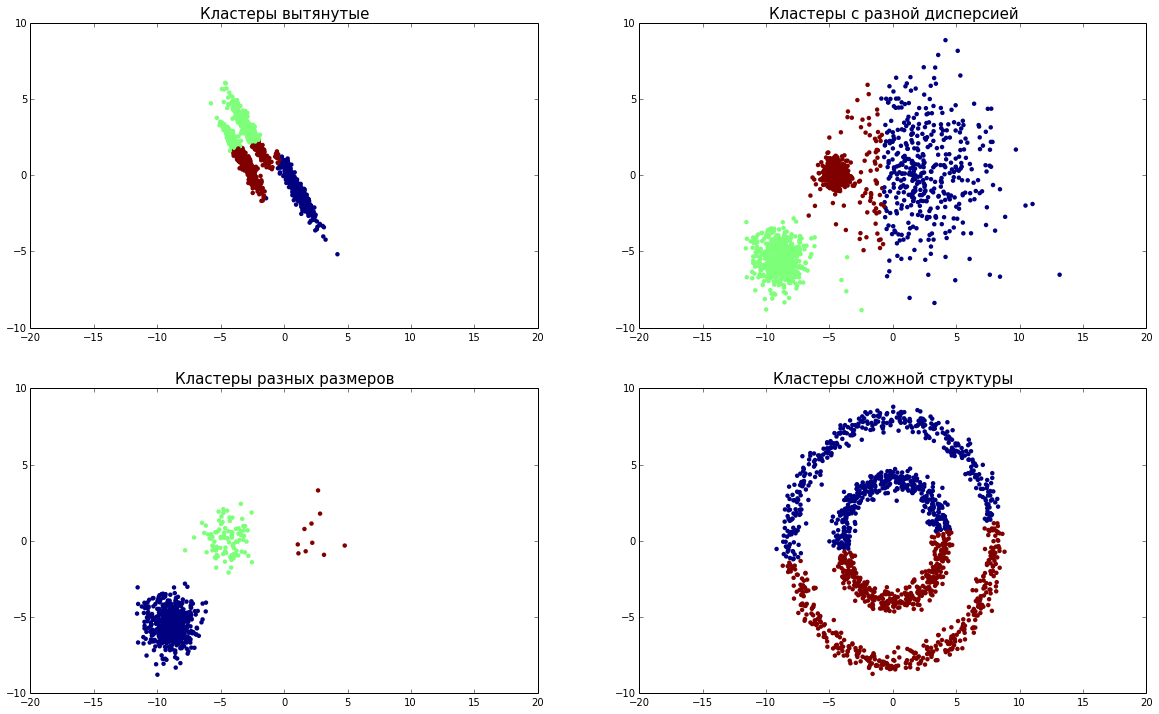

In [112]:
plt.figure(figsize=(20, 12))

# Кластеры вытянутыеточек
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_long)

plt.subplot(221)
plt.scatter(X_long[:, 0], X_long[:, 1], c=y_pred, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Кластеры вытянутые", fontsize=15)

# Кластеры с разной дисперсией
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(222)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Кластеры с разной дисперсией", fontsize=15)

# Кластеры разных размеров
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_sizes)

plt.subplot(223)
plt.scatter(X_sizes[:, 0], X_sizes[:, 1], c=y_pred, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Кластеры разных размеров", fontsize=15)

# Кластеры сложной структуры
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_circles)

plt.subplot(224)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_pred, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Кластеры сложной структуры", fontsize=15)

plt.show()

Видны проблемы данного метода:
* нужно подбирать K
* не умеет работать с кластерами сложной структуры
* не умеет работать с вытянутыми кластерами
* хорошо работает только с четко отделимыми классами
* если позапускать визуализацию, то видно, что не работают некоторые из 

## Алгоритм DBSCAN

### <a href='https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/'> Визуализация </a>

Посмотрите примеры применения DBSCAN на разных датасетах.

### Описание

<a href='https://habr.com/post/322034/'> Хабр </a>

<a href='https://en.wikipedia.org/wiki/DBSCAN'> Википедия </a>

Есть два важных гиперпараметра:
* eps - означает расстояние, на котором две вершины считаются соседями
* min_samples - означает сколько нужно соседей из кластера, чтобы считать вершину коренной

Сам алгоритм состоит из таких шагов:
* Выбрать соседей для каждой вершины на расстоянии до eps
* Найти компоненты связности коренных вершин - добавляем вершину в компоненту коренных, если у нее хотя бы min_samples соседей лежат в этой компоненте
* Добавить оставшиеся вершины в самый популярный кластер соседей, если есть соседи
* Оставшиеся вершины - это выбросы

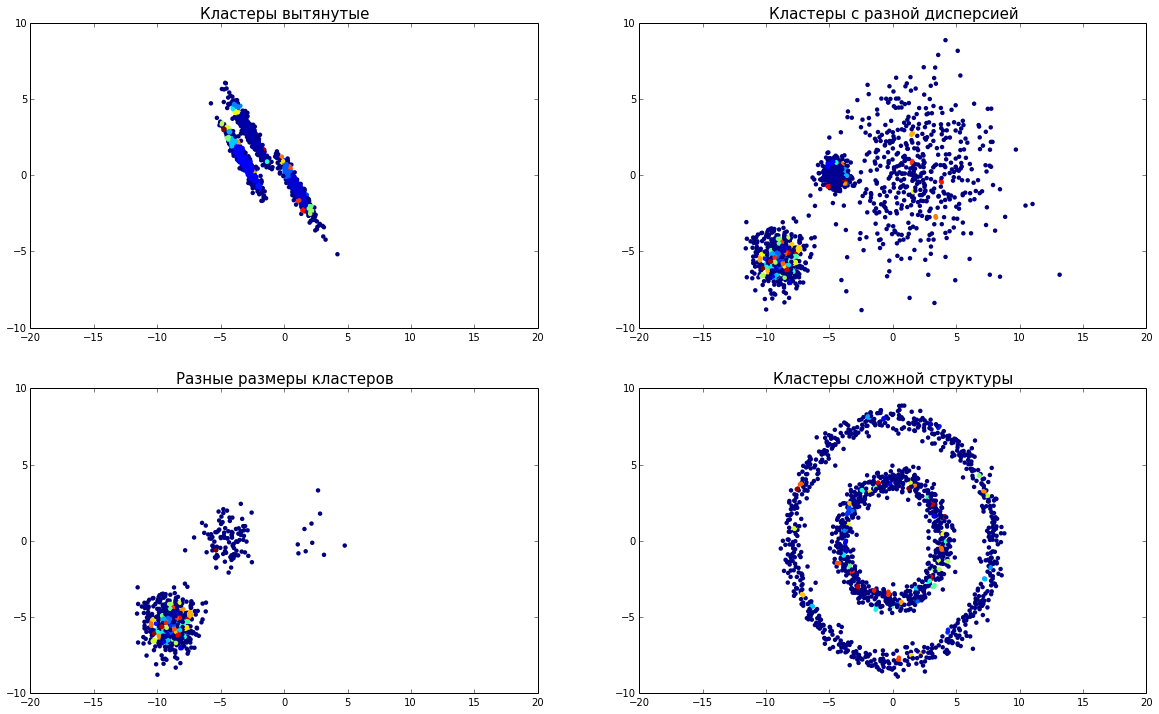

In [62]:
from sklearn.cluster import DBSCAN

plt.figure(figsize=(20, 12))

# Кластеры вытянутыеточек
y_pred = DBSCAN(eps=0.1, min_samples=3).fit_predict(X_long)

plt.subplot(221)
plt.scatter(X_long[:, 0], X_long[:, 1], c=y_pred, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Кластеры вытянутые", fontsize=15)

# Кластеры с разной дисперсией
y_pred = DBSCAN(eps=0.1, min_samples=3).fit_predict(X_varied)

plt.subplot(222)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Кластеры с разной дисперсией", fontsize=15)

# Кластеры разных размеров
y_pred = DBSCAN(eps=0.1, min_samples=3).fit_predict(X_sizes)

plt.subplot(223)
plt.scatter(X_sizes[:, 0], X_sizes[:, 1], c=y_pred, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Разные размеры кластеров", fontsize=15)

# Кластеры сложной структуры
y_pred = DBSCAN(eps=0.1, min_samples=3).fit_predict(X_circles)
plt.subplot(224)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_pred, edgecolors='none')
plt.xlim((-20, 20))
plt.ylim((-10, 10))
plt.title(u"Кластеры сложной структуры", fontsize=15)

plt.show()

### Задание

Подберите параметры DBSCAN вместо eps=0.1, min_samples=3 так, чтобы кластеризация была похожа на верную.

Где насколько хорошо получилось?

### Ответ:

...

## Примеры работы других методов
<a href='http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html'> Красивый график и код </a>, который показывает, как работают разные методы кластеризации

## Более сложный пример датасета: Кластеризация текстов</h1> 

Многие данные можно представить в виде точек в пространстве. Давайте кластеризуем, например, датасет 20newsgroups.

Этот датасет состоит из документов, поделенных на 20 новостных групп. Новостные группы - это что-то вроде темы на форуме, она состоит из сообщений-документов на эту тему.

### Скачаем датасет

In [63]:
from sklearn.datasets import fetch_20newsgroups

In [65]:
train_all = fetch_20newsgroups(subset='train')
print (train_all.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [84]:
simple_dataset = fetch_20newsgroups(
    subset='train', 
    categories=['comp.sys.mac.hardware', 'soc.religion.christian', 'rec.sport.hockey'])

### Посмотрим примеры сообщений

In [85]:
print (simple_dataset.data[0])

From: erik@cheshire.oxy.edu (Erik Adams)
Subject: HELP!!  My Macintosh "luggable" has lines on its screen!
Organization: Occidental College, Los Angeles, CA 90041 USA.
Distribution: comp
Lines: 20

Okay, I don't use it very much, but I would like for it to keep working
correctly, at least as long as Apple continues to make System software
that will run on it, if slowly :-)

Here is the problem:  When the screen is tilted too far back, vertical
lines appear on the screen.  They are every 10 pixels or so, and seem
to be affected somewhat by opening windows and pulling down menus.
It looks to a semi-technical person like there is a loose connection
between the screen and the rest of the computer.

I am open to suggestions that do not involve buying a new computer,
or taking this one to the shop.  I would also like to not have
to buy one of Larry Pina's books.  I like Larry, but I'm not sure
I feel strongly enough about the computer to buy a service manual
for it.

On a related note:  what

In [86]:
print (simple_dataset.data[-1])

From: dlecoint@garnet.acns.fsu.edu (Darius_Lecointe)
Subject: Re: Sabbath Admissions 5of5
Organization: Florida State University
Lines: 21

I find it interesting that cls never answered any of the questions posed. 
Then he goes on the make statements which make me shudder.  He has
established a two-tiered God.  One set of rules for the Jews (his people)
and another set for the saved Gentiles (his people).  Why would God
discriminate?  Does the Jew who accepts Jesus now have to live under the
Gentile rules.

God has one set of rules for all his people.  Paul was never against the
law.  In fact he says repeatedly that faith establishes rather that annuls
the law.  Paul's point is germane to both Jews and Greeks.  The Law can
never be used as an instrument of salvation.  And please do not combine
the ceremonial and moral laws in one.

In Matt 5:14-19 Christ plainly says what He came to do and you say He was
only saying that for the Jews's benefit.  Your Christ must be a
politician, speaki

In [87]:
print (len(simple_dataset.data))

1777


### Сгенерируем признаки (см. тему "Работа с текстом")

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=500, min_df=10)
matrix = vectorizer.fit_transform(simple_dataset.data)
matrix.shape

(1777, 3767)

### Применяем K-Means

In [91]:
model = KMeans(n_clusters=3, random_state=1)
preds = model.fit_predict(matrix.toarray())
print preds
print (simple_dataset.target)

[0 0 2 ..., 0 2 1]
[0 0 1 ..., 0 1 2]


### Валидируем

Проблема: как валидировать результат, если номера кластеров не совпали с реальными номерами? Ну давайте просто переберем все 6 = 3! перестановое и выберем лучшую точность.

In [95]:
import itertools
from sklearn.metrics import accuracy_score as acc
def validate(preds, target):
    accs = []
    permutations = itertools.permutations([0, 1, 2])
    for a, b, c in permutations:
        mapping = {2 : a, 1: b, 0: c}
        mapped_preds = [mapping[pred] for pred in preds]
        accs.append(acc(mapped_preds, target))
    return np.max(accs)
    
print validate(preds, simple_dataset.target)

0.952729319077


Сравним результат с Supervised Learning. Например, с логистической регрессией.

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
print cross_val_score(clf, matrix, simple_dataset.target).mean()

0.985360318588


## Возьмем другую выборку

Возьмем теперь три другие темы.

In [101]:
noteasy_dataset = fetch_20newsgroups(
    subset='train', 
    categories=['comp.sys.mac.hardware', 'comp.os.ms-windows.misc', 'comp.graphics'])
matrix = vectorizer.fit_transform(noteasy_dataset.data)

In [102]:
model = KMeans(n_clusters=3, random_state=1)
preds = model.fit_predict(matrix.toarray())
print preds
print noteasy_dataset.target

[0 1 2 ..., 0 2 0]
[2 1 1 ..., 2 0 2]


In [104]:
validate(preds, noteasy_dataset.target)

0.75356531660011405

In [106]:
clf = LogisticRegression()
print cross_val_score(clf, matrix, noteasy_dataset.target).mean()

0.917279226713


### Задание

Объясните, почему точность при кластеризации в первом датасете очень близка к supervised learning, а во втором датасете сильно меньше. Датасеты отличаются только выбором трех новостных групп.


### Ответ:

...

# Большое задание

## 1) Теоретические задания
Решите любые два.

* Даны пять точек на числовой оси $X = (1; 5; 7; 8; 8)$, число кластеров равно 2. Рассчитайте ответ алгоритма K-means (финальные центры кластеров), если начальные центры кластеров $c_1 = 1$, $c_2 = 10$
* Докажите, что k-means всегда сходится (то есть начиная с какой-то итерации ничего не будет происходить)
* Найдите, прочитайте и вкратце объясните общие принципы работы алгоритмов MeanShift и AgglomerativeClustering

## 2) Практическое задание
### Уменьшение палитры изображения
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения; после выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.
Попробуйте различные алгоритмы кластеризации:

* KMeans
* MeanShift
* AgglomerativeClustering
* DBSCAN

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр)

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Приведите в конце примеры работы лучшего алгоритма на выбранных вами картинках :)

### Вспогомательная функция draw_picture

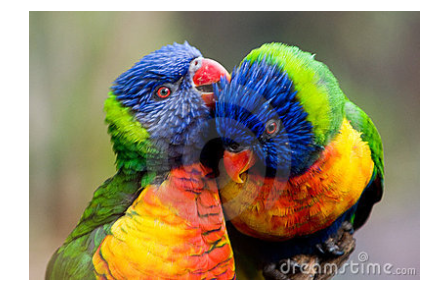

In [115]:
import cv2

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r,g,b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()
    

img = cv2.imread('birds.jpg')
draw_picture(img)

In [119]:
img.shape

(275, 400, 3)

### Решение: